# Lista de Exercícios 10: Controle LQR

> Felipe Andrade Garcia Tommaselli- 11800910

> Gianluca Capezzuto Sardinha - 11876900

> Kaique Lima dos Santos - 12701898

- Slide Aula 10: https://marofe.github.io/controle-digital/2024/aula10.html



1 Atividade 1  
Nessa atividade, o objetivo é implementar o controle LQR em tempo discreto a partir das equações resultantes da solução do problema de controle ótimo de horizonte finito:

$$
\min_{u_0,u_1,...,u_{N−1}} \sum_{k=0}^{N-1} x_k^\top Q x_k + u_k^\top R u_k + x_N^\top P_N x_N
$$

tal que
$$
x_{k+1} = Ax_k + Bu_k
$$
$$
x_k \in \mathbb{R}^n
$$
$$
u_k \in \mathbb{R}^m
$$

Sabe-se que a solução ótima é dada por
$$
u_k^* = -(R + B^\top P_{k+1} B)^{-1} B^\top P_{k+1} A x_k
$$

em que $ P_{k+1} $ é obtido através da Equação de Riccati em tempo discreto:
$$
P_k = Q + A^\top P_{k+1} A - A^\top P_{k+1} B (R + B^\top P_{k+1} B)^{-1} B^\top P_{k+1} A
$$

cuja solução pode ser obtida “de trás para frente” fazendo $ k = N - 1, k = N - 2, \ldots, k = 1, k = 0 $.

Considere o modelo em espaço de estados a seguir
$$
x_{k+1} = \begin{bmatrix} 3 & -1 \\ 0 & 2 \end{bmatrix} x_k + \begin{bmatrix} 1 \\ 2 \end{bmatrix} u_k
$$

Suponha que a função custo seja dada por
$$
J = \sum_{k=0}^{N-1} x_k^\top Q x_k + u_k^\top R u_k + x_N^\top P_N x_N
$$

com

$$
Q = \begin{bmatrix} 2 & 0 \\ 0 & 3 \end{bmatrix}, \quad R = 1, \quad P_N = \begin{bmatrix} 0.1 & 0 \\ 0 & 0.1 \end{bmatrix}.
$$

O código Matlab a seguir implementa o controle LQR de horizonte finito ($ N < \infty $) para esse sistema:

---
```matlab
1. close all  
2. clear all  
3. clc  
4. %%  
5. A = [3 -1; 0 2];  
6. B = [1; 2];  
7. %%  
8. rank(ctrb(A, B))  
9. %%  
10. N = 20; % horizonte  
11. x = zeros(2, N);  
12. u = zeros(1, N);  
13. P = zeros(2, 2, N);  
14. trP = zeros(1, N);  
15. %% Resolve eq. de riccati (backward in time)  
16. Q = [2 0; 0 3];  
17. R = 1;  
18. P(:, :, N) = 0.1 * eye(2);  
19. trP(N) = trace(P(:, :, N));  
20. for k = N-1:-1:1  
21.     P(:, :, k) = Q + A' * P(:, :, k + 1) * A - A' * P(:, :, k + 1) * B / (R + B' * P(:, :, k + 1) * B) * B' * P(:, :, k + 1) * A;  
22.     trP(k) = trace(P(:, :, k));  
23. end  
24. %% simula sistema com controle LQR de horizonte finito  
25. x(:, 1) = [10; 10];  
26. for k = 1:N-1  
27.     u(k) = -inv(R + B' * P(:, :, k + 1) * B) * B' * P(:, :, k + 1) * A * x(:, k); % controle LQR  
28.     x(:, k + 1) = A * x(:, k) + B * u(k);  
29. end  
30. %%  
31. figure  
32. stairs(x')  
33. title('estados')  
34. figure  
35. plot(trP, 'o-')  
36. title('Traço de P')  
37. %%  
```
---

Note que o traço da matriz $ P_k $ converge para um valor constante, indicando que o sistema possui uma solução de Riccati estacionária.

Usando a mesma lógica, implemente um controle LQR de horizonte finito com $ N = 30 $ para o sistema:

$$
x_{k+1} = \begin{bmatrix} 3 & 0 & 0 \\ 5 & 4 & 0 \\ 1 & 2 & 3 \end{bmatrix} x_k + \begin{bmatrix} 1 \\ 2 \\ 5 \end{bmatrix} u_k
$$

Considere
$$
Q = \begin{bmatrix} 2 & 0 & 0 \\ 0 & 3 & 0 \\ 0 & 0 & 1 \end{bmatrix}, \quad R = 3, \quad P_N = \begin{bmatrix} 0.5 & 0 & 0 \\ 0 & 0.5 & 0 \\ 0 & 0 & 0.5 \end{bmatrix}.
$$

In [ ]:
# Importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt

# Fechar todas as figuras abertas
plt.close('all')

# Definir as matrizes do sistema
A = np.array([[3, 0, 0],
              [5, 4, 0],
              [1, 2, 3]])

B = np.array([[1],
              [2],
              [5]])

# Verificar a controlabilidade (opcional)
# Calcular a matriz de controlabilidade
control_matrix = np.hstack([B, np.dot(A, B), np.dot(np.dot(A, A), B)])
rank_control = np.linalg.matrix_rank(control_matrix)

# Definir o horizonte
N = 30  # Horizonte de tempo

# Inicializar as variáveis de estado, controle e matrizes P
n = A.shape[0]  # Número de estados
m = B.shape[1]  # Número de entradas de controle

x = np.zeros((n, N))       # Matriz de estados
u = np.zeros((m, N-1))     # Vetor de controles
P = np.zeros((n, n, N))    # Matrizes P_k
trP = np.zeros(N)          # Traço de P_k

# Definir as matrizes de custo
Q = np.diag([2, 3, 1])         # Matriz Q
R = np.array([[3]])            # Escalar R transformado em matriz 1x1
PN = 0.5 * np.eye(n)           # Matriz P_N

# Condição inicial para a equação de Riccati
P[:, :, N-1] = PN
trP[N-1] = np.trace(P[:, :, N-1])

# Resolver a equação de Riccati "para trás"
for k in range(N-2, -1, -1):
    Pk_next = P[:, :, k+1]
    S = R + B.T @ Pk_next @ B
    K = np.linalg.inv(S) @ B.T @ Pk_next @ A
    P[:, :, k] = Q + A.T @ Pk_next @ A - A.T @ Pk_next @ B @ K
    trP[k] = np.trace(P[:, :, k])

# Definir o estado inicial
x[:, 0] = np.array([10, 10, 10])

# Simular o sistema com o controle LQR
for k in range(N-1):
    Pk_next = P[:, :, k+1]
    S = R + B.T @ Pk_next @ B
    K = np.linalg.inv(S) @ B.T @ Pk_next @ A
    u[:, k] = -K @ x[:, k]
    x[:, k+1] = A @ x[:, k] + B @ u[:, k]


Posto da matriz de controlabilidade: 3


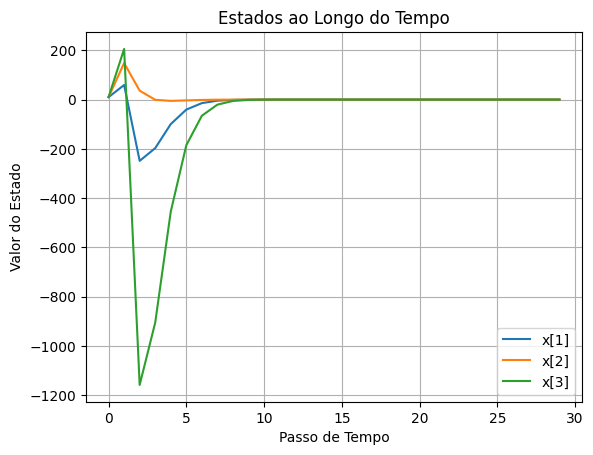

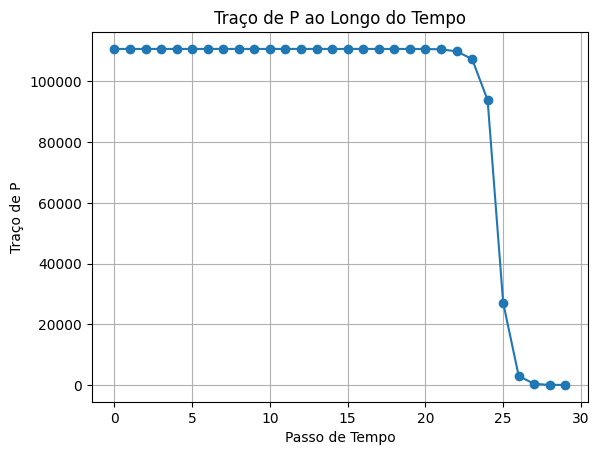

In [ ]:
# Imprimir o posto da matriz de controlabilidade
print(f"Posto da matriz de controlabilidade: {rank_control}")

# Plotar os estados ao longo do tempo
plt.figure()
for i in range(n):
    plt.plot(range(N), x[i, :], label=f'x[{i+1}]')
plt.title('Estados ao Longo do Tempo')
plt.xlabel('Passo de Tempo')
plt.ylabel('Valor do Estado')
plt.legend()
plt.grid(True)

# Plotar o traço das matrizes P_k
plt.figure()
plt.plot(range(N), trP, 'o-')
plt.title('Traço de P ao Longo do Tempo')
plt.xlabel('Passo de Tempo')
plt.ylabel('Traço de P')
plt.grid(True)

# Exibir os gráficos
plt.show()



2 Atividade 2  
Repita a atividade anterior, porém, agora considere um horizonte infinito ($ N \rightarrow \infty $) para a formulação do controle ótimo. Ou seja, considere o problema de controle ótimo na forma:

$$
\min_{u_0, u_1, \ldots} \lim_{N \to \infty} \sum_{k=0}^{N-1} x_k^\top Q x_k + u_k^\top R u_k + x_N^\top P_N x_N
$$

tal que
$$
x_{k+1} = Ax_k + Bu_k
$$
$$
x_k \in \mathbb{R}^n
$$
$$
u_k \in \mathbb{R}^m
$$

A solução ótima é dada por
$$
u_k^* = -(R + B^\top P_\infty B)^{-1} B^\top P_\infty A x_k
$$

em que $ P_\infty $ é a solução estacionária da Equação de Riccati em tempo discreto:
$$
P_\infty = Q + A^\top P_\infty A - A^\top P_\infty B (R + B^\top P_\infty B)^{-1} B^\top P_\infty A
$$

cuja solução pode ser obtida “de trás para frente” fazendo $ k = N - 1, k = N - 2, \ldots, k = 1, k = 0 $ com $ N $ suficientemente grande (suficiente para que a equação de Riccati entre em regime estacionário) ou também pode-se utilizar o comando `dare` do Matlab. Por simplicidade, considere $ P_N = 0 $.

O código do Matlab a seguir compara a solução de Riccati obtida via recursão “de trás para frente” com a solução via comando `dare`.

---
```matlab
1. close all  
2. clear all  
3. clc  
4. %%  
5. A = [3 -1; 0 2];  
6. B = [1; 2];  
7. %%  
8. rank(ctrb(A, B))  
9. %%  
10. N = 20; % horizonte  
11. x = zeros(2, N);  
12. u = zeros(1, N);  
13. P = zeros(2, 2, N);  
14. trP = zeros(1, N);  
15. %% Resolve eq. de riccati (backward in time)  
16. Q = [2 0; 0 3];  
17. R = 1;  
18. P(:, :, N) = zeros(2);  
19. trP(N) = trace(P(:, :, N));  
20. for k = N-1:-1:1  
21.     P(:, :, k) = Q + A' * P(:, :, k + 1) * A - A' * P(:, :, k + 1) * B / (R + B' * P(:, :, k + 1) * B) * B' * P(:, :, k + 1) * A;  
22.     trP(k) = trace(P(:, :, k));  
23. end  
24. Pinf = dare(A, B, Q, R);  
25. trPinf = trace(Pinf);  
26. %%  
27. figure  
28. plot(trP, 'o-')  
29. hold on  
30. line([0 N], [trPinf trPinf], 'linestyle', '--', 'color', 'black', 'linewidth', 1.5)  
31. title('Traço de P')  
32. legend('trP', 'trP \infty')
33. %%  
```  
---

In [ ]:
# Importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_discrete_are

# Fechar todas as figuras abertas
plt.close('all')

# Definir as matrizes do sistema
A = np.array([[3, -1],
              [0,  2]])

B = np.array([[1],
              [2]])

# Verificar a controlabilidade (opcional)
# Calcular a matriz de controlabilidade
control_matrix = np.hstack([B, A @ B])
rank_control = np.linalg.matrix_rank(control_matrix)

# Definir o horizonte (suficientemente grande)
N = 50  # Horizonte de tempo suficientemente grande

# Inicializar as variáveis de estado, controle e matrizes P
n = A.shape[0]  # Número de estados
m = B.shape[1]  # Número de entradas de controle

x = np.zeros((n, N))       # Matriz de estados
u = np.zeros((m, N-1))     # Vetor de controles
P = np.zeros((n, n, N))    # Matrizes P_k
trP = np.zeros(N)          # Traço de P_k

# Definir as matrizes de custo
Q = np.array([[2, 0],
              [0, 3]])         # Matriz Q

R = np.array([[1]])            # Escalar R transformado em matriz 1x1

PN = np.zeros((n, n))          # Matriz P_N = zeros, conforme solicitado

# Condição inicial para a equação de Riccati
P[:, :, N-1] = PN
trP[N-1] = np.trace(P[:, :, N-1])

# Resolver a equação de Riccati "para trás" (iterativamente)
for k in range(N-2, -1, -1):
    Pk_next = P[:, :, k+1]
    S = R + B.T @ Pk_next @ B
    K = np.linalg.inv(S) @ B.T @ Pk_next @ A
    P[:, :, k] = Q + A.T @ Pk_next @ A - A.T @ Pk_next @ B @ K
    trP[k] = np.trace(P[:, :, k])

# Resolver a Equação de Riccati estacionária usando solve_discrete_are
Pinf = solve_discrete_are(A, B, Q, R)
trPinf = np.trace(Pinf)

# Definir o estado inicial
x[:, 0] = np.array([10, 10])

# Calcular o ganho de controle estacionário
S_inf = R + B.T @ Pinf @ B
K_inf = np.linalg.inv(S_inf) @ B.T @ Pinf @ A

# Simular o sistema com o controle ótimo estacionário
for k in range(N-1):
    u[:, k] = -K_inf @ x[:, k]
    x[:, k+1] = A @ x[:, k] + B @ u[:, k]


Posto da matriz de controlabilidade: 2


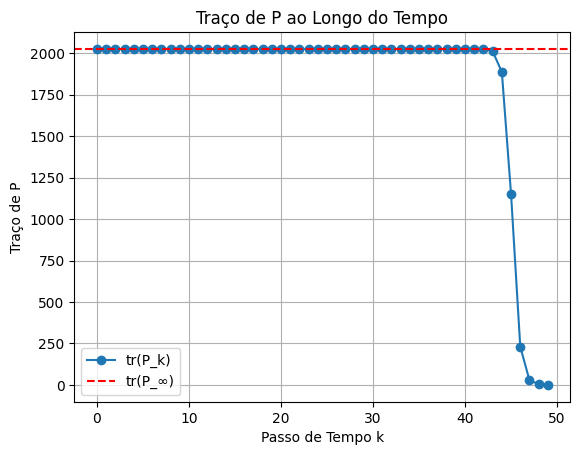

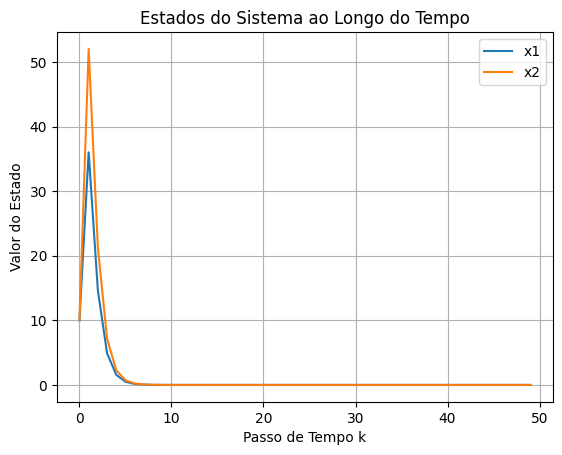

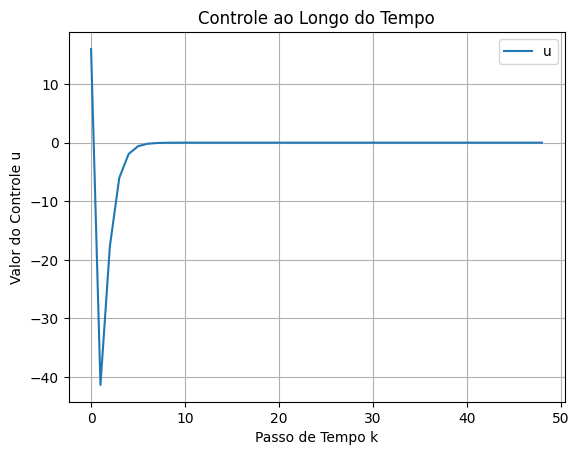

In [ ]:
# Imprimir o posto da matriz de controlabilidade
print(f"Posto da matriz de controlabilidade: {rank_control}")

# Plotar o traço das matrizes P_k e o valor estacionário tr(Pinf)
plt.figure()
plt.plot(range(N), trP, 'o-', label='tr(P_k)')
plt.axhline(y=trPinf, color='r', linestyle='--', label='tr(P_∞)')
plt.title('Traço de P ao Longo do Tempo')
plt.xlabel('Passo de Tempo k')
plt.ylabel('Traço de P')
plt.legend()
plt.grid(True)

# Plotar os estados ao longo do tempo
plt.figure()
plt.plot(range(N), x[0, :], label='x1')
plt.plot(range(N), x[1, :], label='x2')
plt.title('Estados do Sistema ao Longo do Tempo')
plt.xlabel('Passo de Tempo k')
plt.ylabel('Valor do Estado')
plt.legend()
plt.grid(True)

# Plotar o controle ao longo do tempo
plt.figure()
plt.plot(range(N-1), u[0, :], label='u')
plt.title('Controle ao Longo do Tempo')
plt.xlabel('Passo de Tempo k')
plt.ylabel('Valor do Controle u')
plt.legend()
plt.grid(True)

# Exibir os gráficos
plt.show()


3 Atividade 3  
Nessa atividade, o objetivo é projetar um controlador ótimo de realimentação de estados. Neste exemplo, será utilizado o modelo do *self-balanced robot*, conforme ilustrado na Figura 1. As EDO que descrevem o comportamento dessa planta são dadas a seguir:

Figura 1: Self-balanced robot.

$$
(M + m) \ddot{x} - m l \cos(\theta) \ddot{\theta} + m l \dot{\theta}^2 \sin(\theta) + \alpha_1 \dot{x} = u,
$$

$$
\frac{l}{2} m \ddot{\theta} - m l \cos(\theta) \ddot{x} - g m l \sin(\theta) + \alpha_2 \dot{\theta} = 0.
$$

O vetor de estados é dado por

$$
x = \begin{bmatrix} x \\ \dot{x} \\ \theta \\ \dot{\theta} \end{bmatrix},
$$

onde:

- $ x $ → posição,
- $ \dot{x} $ → velocidade,
- $ \theta $ → posição angular,
- $ \dot{\theta} $ → velocidade angular,

e o sinal de entrada é o torque que atua na roda.

Adotando

$$
x_0 = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}, \quad u_0 = 0,
$$

como ponto de operação do sistema (posição vertical com velocidade zero), pode-se obter um modelo linearizado na forma

$$
\dot{x} = A(x_0, u_0)x + B(x_0, u_0)u,
$$

válido para regiões próximas do ponto $(x_0, u_0)$. Após obter o modelo linearizado, pode-se utilizar o comando `c2d` para obter o equivalente em tempo discreto. Considere a condição inicial do sistema real como $ x_0 = [2 \ 0 \ \frac{10 \pi}{180} \ 0]^\top $.

---

1. **Projete um controle de realimentação de estados do tipo LQR com horizonte infinito** de forma a trazer o sistema para a origem $ x_k = [0 \ 0 \ 0 \ 0]^\top $ em menos de 5s. Assuma que os estados são acessíveis diretamente (não é necessário um observador). Defina as matrizes $ Q $ e $ R $ para obter um desempenho que você considere razoável.  
   - Dica: use o comando `dlqr` do Matlab para obter o ganho ótimo de realimentação de estados.

2. **Repita o item anterior com valores crescentes de $ Q $ e $ R $** e para cada caso apresente os polos de malha fechada do sistema. O que ocorre com os polos na medida que as matrizes $ Q $ e $ R $ aumentam?

3. **Faça uma modificação na simulação da planta** de forma a ser possível controlar a planta para posições diferentes de zero usando LQR.
   - Dica: uma vez que o Jacobiano do sistema não depende da posição, pode-se usar o modelo linearizado na forma de desvio de estado e controle
     $$
     \delta x_{k+1} = A_d \delta x_k + B_d \delta u_k,
     $$
     em que $ \delta x_k = x_k - x_0 $, $ \delta u_k = u_k - u_0 $, e $ x_0 $ é o ponto de operação e $ u_0 $ é a ação de controle de equilíbrio. Dessa forma, a lei de controle é dada por $ u_k = -K \delta x_k + u_0 $.
   - Assim, mudando-se o ponto de operação, a lei de controle vai “regular” o sistema para próximo de $ x_0 $ sem a necessidade de recalcular o ganho de realimentação de estados! Note que $ u_0 = 0 $ nesse exemplo do *self-balanced robot*.

Para avaliar o desempenho, faça o *self-balanced robot* se mover da posição $ x = 0 $ até a posição $ x = 4 $ e permanecer por 5s nessa posição. Em seguida, faça ele se mover para a posição $ x = -4 $.

- **Dica:** Use o código de exemplo disponível no e-disciplina (arquivo `self-balanced-robot.zip`) como ponto de partida.
---

Parte 1

In [ ]:
# Importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_discrete_are
from scipy.signal import cont2discrete

# Fechar todas as figuras abertas
plt.close('all')

# Definir os parâmetros físicos do sistema
M = 0.5    # Massa do carro (kg)
m = 0.2    # Massa do pêndulo (kg)
b = 0.1    # Coeficiente de atrito do carro (N/m/s)
I = 0.006  # Momento de inércia do pêndulo (kg*m^2)
g = 9.8    # Aceleração devido à gravidade (m/s^2)
l = 0.3    # Comprimento do centro de massa do pêndulo (m)
alpha1 = b  # Coeficiente de atrito linear
alpha2 = 0.05  # Coeficiente de atrito angular

# Cálculo de parâmetros intermediários
p = I*(M+m)+M*m*l**2  # Denominador comum

# Matriz A contínua (modelo linearizado)
A_cont = np.array([[0, 1, 0, 0],
                   [0, -(I+m*l**2)*alpha1/p, (m**2 * g * l**2)/p, -(m*l*alpha2)/p],
                   [0, 0, 0, 1],
                   [0, -(m*l*alpha1)/p, m*g*l*(M+m)/p, -alpha2*(M+m)/p]])

# Matriz B contínua (modelo linearizado)
B_cont = np.array([[0],
                   [(I + m*l**2)/p],
                   [0],
                   [m*l/p]])

# Definir o tempo de amostragem
dt = 0.01  # Intervalo de tempo (s)

# Converter o modelo contínuo para discreto
system = (A_cont, B_cont, np.eye(4), np.zeros((4,1)))
A_d, B_d, _, _, _ = cont2discrete(system, dt)

# Definir as matrizes de custo Q e R
Q = np.diag([10, 1, 1000, 1])  # Ajuste dos pesos dos estados
R = np.array([[0.01]])         # Peso do esforço de controle

# Resolver a Equação de Riccati discreta para obter K
P = solve_discrete_are(A_d, B_d, Q, R)
K = np.linalg.inv(B_d.T @ P @ B_d + R) @ (B_d.T @ P @ A_d)

# Definir o estado inicial
x0 = np.array([[2],
               [0],
               [10 * np.pi / 180],  # Converter 10 graus para radianos
               [0]])

# Definir o número de passos de tempo para simulação
t_final = 5    # Tempo final de simulação em segundos
N = int(t_final / dt)  # Número de passos de tempo

# Inicializar vetores para armazenar os estados e controles
x = np.zeros((4, N+1))
u = np.zeros((1, N))
time = np.linspace(0, t_final, N+1)

# Atribuir o estado inicial
x[:, [0]] = x0

# Simular o sistema em malha fechada
for k in range(N):
    # Calcular o controle usando realimentação de estados
    u[:, k] = -K @ x[:, [k]]
    # Atualizar o estado do sistema
    x[:, [k+1]] = A_d @ x[:, [k]] + B_d @ u[:, [k]]


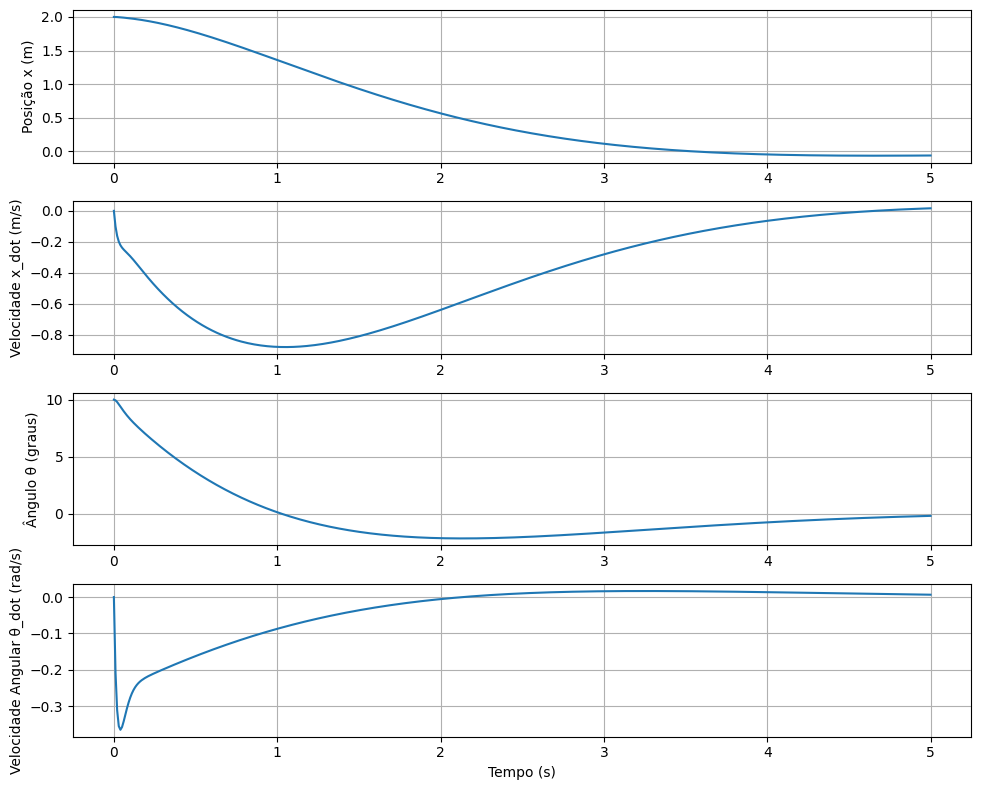

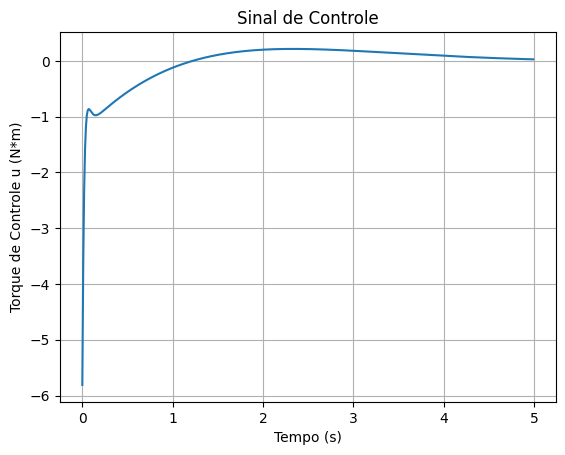

Autovalores da Matriz em Malha Fechada:
[0.69174751+0.07438275j 0.69174751-0.07438275j 0.99271022+0.00660645j
 0.99271022-0.00660645j]


In [ ]:
# Plotar os estados do sistema ao longo do tempo
plt.figure(figsize=(10,8))

# Posição x
plt.subplot(4,1,1)
plt.plot(time, x[0, :].flatten())
plt.ylabel('Posição x (m)')
plt.grid(True)

# Velocidade x_dot
plt.subplot(4,1,2)
plt.plot(time, x[1, :].flatten())
plt.ylabel('Velocidade x_dot (m/s)')
plt.grid(True)

# Ângulo theta
plt.subplot(4,1,3)
plt.plot(time, x[2, :].flatten() * (180/np.pi))  # Converter radianos para graus
plt.ylabel('Ângulo θ (graus)')
plt.grid(True)

# Velocidade angular theta_dot
plt.subplot(4,1,4)
plt.plot(time, x[3, :].flatten())
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade Angular θ_dot (rad/s)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotar o sinal de controle ao longo do tempo
plt.figure()
plt.plot(time[:-1], u[0, :].flatten())
plt.xlabel('Tempo (s)')
plt.ylabel('Torque de Controle u (N*m)')
plt.title('Sinal de Controle')
plt.grid(True)
plt.show()

# Imprimir os autovalores da matriz de malha fechada
A_cl = A_d - B_d @ K
eigvals, _ = np.linalg.eig(A_cl)
print('Autovalores da Matriz em Malha Fechada:')
print(eigvals)


In [ ]:
# Importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_discrete_are
from scipy.signal import cont2discrete

# Fechar todas as figuras abertas
plt.close('all')

# Definir os parâmetros físicos do sistema
M = 0.5    # Massa do carro (kg)
m = 0.2    # Massa do pêndulo (kg)
b = 0.1    # Coeficiente de atrito do carro (N/m/s)
I = 0.006  # Momento de inércia do pêndulo (kg*m^2)
g = 9.81   # Aceleração da gravidade (m/s^2)
l = 0.3    # Comprimento do centro de massa do pêndulo (m)
alpha1 = b  # Coeficiente de atrito linear
alpha2 = 0.05  # Coeficiente de atrito angular

# Cálculo de parâmetros intermediários
p = I*(M+m) + M*m*l**2  # Denominador comum

# Matriz A contínua (modelo linearizado)
A_cont = np.array([
    [0, 1, 0, 0],
    [0, -(I + m*l**2)*alpha1/p, (m**2 * g * l**2)/p, -(m*l*alpha2)/p],
    [0, 0, 0, 1],
    [0, -(m*l*alpha1)/p, m*g*l*(M + m)/p, -alpha2*(M + m)/p]
])

# Matriz B contínua (modelo linearizado)
B_cont = np.array([
    [0],
    [(I + m*l**2)/p],
    [0],
    [m*l/p]
])

# Definir o tempo de amostragem
dt = 0.01  # Intervalo de tempo (s)

# Converter o modelo contínuo para discreto
system = (A_cont, B_cont, np.eye(4), np.zeros((4,1)))
A_d, B_d, _, _, _ = cont2discrete(system, dt)

# Verificar a controlabilidade
from numpy.linalg import matrix_rank

# Matriz de controlabilidade
n = A_d.shape[0]
control_matrix = B_d
for i in range(1, n):
    control_matrix = np.hstack((control_matrix, np.linalg.matrix_power(A_d, i) @ B_d))

rank_control = matrix_rank(control_matrix)
print(f"Posto da matriz de controlabilidade: {rank_control}")

# Definir as matrizes de custo Q e R
Q = np.diag([10, 1, 1000, 1])  # Ajuste dos pesos dos estados
R = np.array([[0.01]])         # Peso do esforço de controle


# Resolver a Equação de Riccati discreta para obter P
P = solve_discrete_are(A_d, B_d, Q, R)

# Calcular o ganho de realimentação de estados K
K = np.linalg.inv(R + B_d.T @ P @ B_d) @ (B_d.T @ P @ A_d)

# Definir a condição inicial
x0 = np.array([[2],
               [0],
               [10 * np.pi / 180],  # Converter 10 graus para radianos
               [0]])

# Definir o número de passos de tempo para simulação
t_final = 5    # Tempo final de simulação em segundos
N = int(t_final / dt)  # Número de passos de tempo
time = np.linspace(0, t_final, N+1)

# Inicializar vetores para armazenar os estados e controles
x = np.zeros((4, N+1))
u = np.zeros((1, N))

# Atribuir o estado inicial
x[:, [0]] = x0

# Simular o sistema em malha fechada
for k in range(N):
    # Calcular o controle usando realimentação de estados
    u[:, k] = -K @ x[:, [k]]
    # Atualizar o estado do sistema
    x[:, [k+1]] = A_d @ x[:, [k]] + B_d @ u[:, [k]]


Posto da matriz de controlabilidade: 4


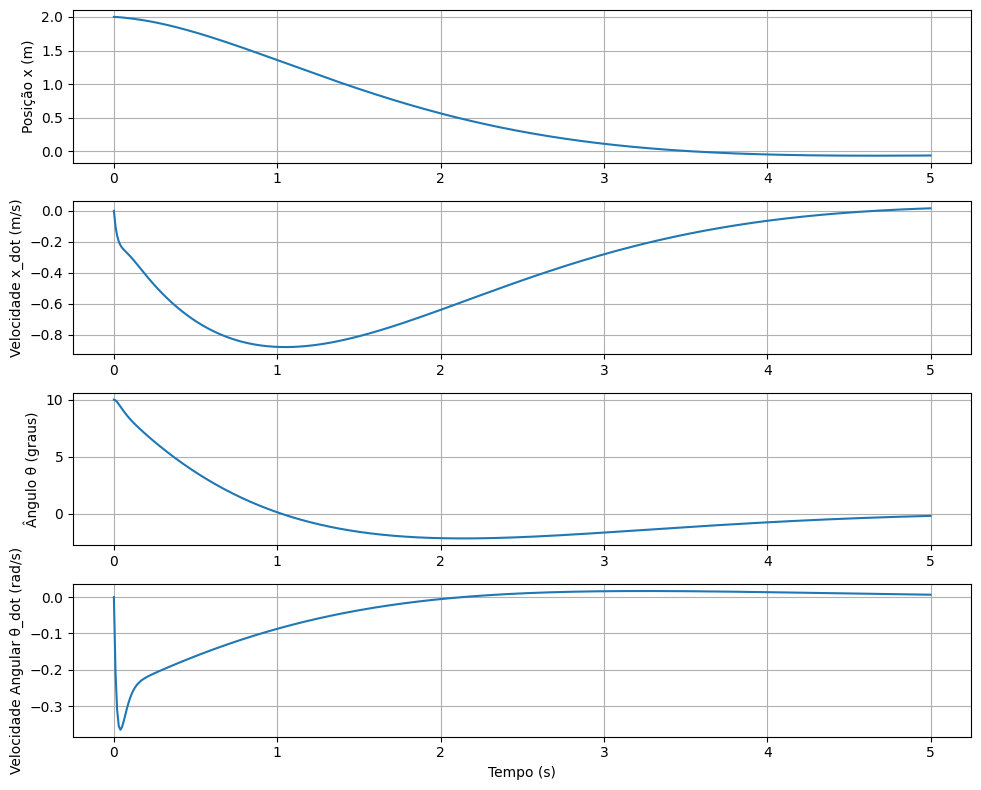

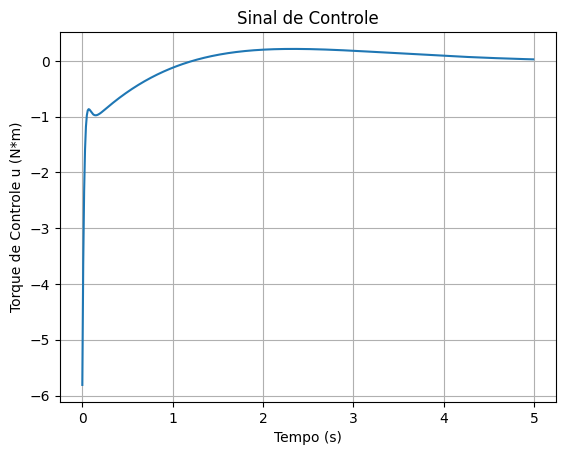

Autovalores da Matriz em Malha Fechada:
[0.69174615+0.07437843j 0.69174615-0.07437843j 0.99270637+0.00660961j
 0.99270637-0.00660961j]


In [ ]:
# Plotar os estados do sistema ao longo do tempo
plt.figure(figsize=(10,8))

# Posição x
plt.subplot(4,1,1)
plt.plot(time, x[0, :].flatten())
plt.ylabel('Posição x (m)')
plt.grid(True)

# Velocidade x_dot
plt.subplot(4,1,2)
plt.plot(time, x[1, :].flatten())
plt.ylabel('Velocidade x_dot (m/s)')
plt.grid(True)

# Ângulo theta
plt.subplot(4,1,3)
plt.plot(time, x[2, :].flatten() * (180/np.pi))  # Converter radianos para graus
plt.ylabel('Ângulo θ (graus)')
plt.grid(True)

# Velocidade angular theta_dot
plt.subplot(4,1,4)
plt.plot(time, x[3, :].flatten())
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade Angular θ_dot (rad/s)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotar o sinal de controle ao longo do tempo
plt.figure()
plt.plot(time[:-1], u[0, :].flatten())
plt.xlabel('Tempo (s)')
plt.ylabel('Torque de Controle u (N*m)')
plt.title('Sinal de Controle')
plt.grid(True)
plt.show()

# Imprimir os autovalores da matriz em malha fechada
A_cl = A_d - B_d @ K
eigvals, _ = np.linalg.eig(A_cl)
print('Autovalores da Matriz em Malha Fechada:')
print(eigvals)


Parte 2

In [ ]:
# Importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_discrete_are
from scipy.signal import cont2discrete

# Fechar todas as figuras abertas
plt.close('all')

# Definir os parâmetros físicos do sistema
M = 0.5    # Massa do carro (kg)
m = 0.2    # Massa do pêndulo (kg)
b = 0.1    # Coeficiente de atrito do carro (N/m/s)
I = 0.006  # Momento de inércia do pêndulo (kg*m^2)
g = 9.81   # Aceleração da gravidade (m/s^2)
l = 0.3    # Comprimento do centro de massa do pêndulo (m)
alpha1 = b     # Coeficiente de atrito linear
alpha2 = 0.05  # Coeficiente de atrito angular

# Cálculo de parâmetros intermediários
p = I*(M + m) + M*m*l**2  # Denominador comum

# Matriz A contínua (modelo linearizado)
A_cont = np.array([
    [0, 1, 0, 0],
    [0, -((I + m*l**2)*alpha1)/p, (m**2 * g * l**2)/p, -((m*l*alpha2))/p],
    [0, 0, 0, 1],
    [0, -((m*l*alpha1))/p, m*g*l*(M + m)/p, -((alpha2*(M + m)))/p]
])

# Matriz B contínua (modelo linearizado)
B_cont = np.array([
    [0],
    [(I + m*l**2)/p],
    [0],
    [m*l/p]
])

# Definir o tempo de amostragem
dt = 0.01  # Intervalo de tempo (s)

# Converter o modelo contínuo para discreto
system = (A_cont, B_cont, np.eye(4), np.zeros((4,1)))
A_d, B_d, _, _, _ = cont2discrete(system, dt)

# Definir os conjuntos crescentes de Q e R
Q_values = [
    np.diag([10, 1, 1000, 1]),
    np.diag([50, 5, 2000, 5]),
    np.diag([100, 10, 5000, 10]),
    np.diag([500, 50, 10000, 50])
]

R_values = [
    np.array([[0.01]]),
    np.array([[0.1]]),
    np.array([[1]]),
    np.array([[10]])
]

# Definir a condição inicial
x0 = np.array([[2],
               [0],
               [10 * np.pi / 180],  # Converter 10 graus para radianos
               [0]])

# Definir o tempo de simulação
t_final = 5    # Tempo final de simulação em segundos
N_sim = int(t_final / dt)  # Número de passos de simulação
time = np.linspace(0, t_final, N_sim+1)

# Listas para armazenar os resultados
K_list = []
eigvals_list = []
states_list = []
controls_list = []

# Loop para calcular K, simular o sistema e armazenar os resultados para cada caso
for Q, R in zip(Q_values, R_values):
    # Resolver a Equação de Riccati estacionária para obter P_inf
    P_inf = solve_discrete_are(A_d, B_d, Q, R)

    # Calcular o ganho de controle estacionário K_inf
    S_inf = R + B_d.T @ P_inf @ B_d
    K_inf = np.linalg.inv(S_inf) @ B_d.T @ P_inf @ A_d
    K_list.append(K_inf)

    # Calcular os autovalores da matriz em malha fechada
    A_cl = A_d - B_d @ K_inf
    eigvals, _ = np.linalg.eig(A_cl)
    eigvals_list.append(eigvals)

    # Inicializar vetores para armazenar os estados e controles
    x = np.zeros((4, N_sim+1))
    u = np.zeros((1, N_sim))

    # Atribuir o estado inicial
    x[:, [0]] = x0

    # Simular o sistema em malha fechada
    for k in range(N_sim):
        # Calcular o controle usando realimentação de estados
        u[:, k] = -K_inf @ x[:, [k]]
        # Atualizar o estado do sistema
        x[:, [k+1]] = A_d @ x[:, [k]] + B_d @ u[:, [k]]

    # Armazenar os resultados
    states_list.append(x)
    controls_list.append(u)



Caso 1:
Q = 
[[  10    0    0    0]
 [   0    1    0    0]
 [   0    0 1000    0]
 [   0    0    0    1]]
R = 
[[0.01]]
Ganho K = 
[[-22.15265355 -36.36116898 287.14112064  26.81268172]]
Autovalores da Matriz em Malha Fechada:
[0.69174615+0.07437843j 0.69174615-0.07437843j 0.99270637+0.00660961j
 0.99270637-0.00660961j]

Caso 2:
Q = 
[[  50    0    0    0]
 [   0    5    0    0]
 [   0    0 2000    0]
 [   0    0    0    5]]
R = 
[[0.1]]
Ganho K = 
[[-17.4564495  -24.36053116 163.68773781  18.88562507]]
Autovalores da Matriz em Malha Fechada:
[0.77650086+0.02568819j 0.77650086-0.02568819j 0.99066014+0.00802781j
 0.99066014-0.00802781j]

Caso 3:
Q = 
[[ 100    0    0    0]
 [   0   10    0    0]
 [   0    0 5000    0]
 [   0    0    0   10]]
R = 
[[1]]
Ganho K = 
[[ -8.61179927 -12.75129069  93.80556756  11.09635701]]
Autovalores da Matriz em Malha Fechada:
[0.85287674+0.07928091j 0.85287674-0.07928091j 0.99122865+0.00765864j
 0.99122865-0.00765864j]

Caso 4:
Q = 
[[  500     0     0  

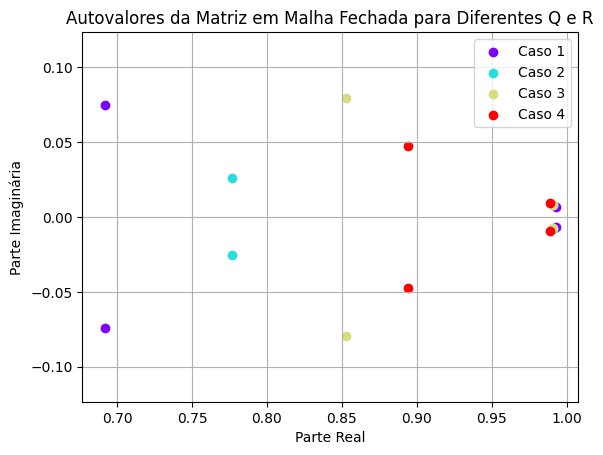

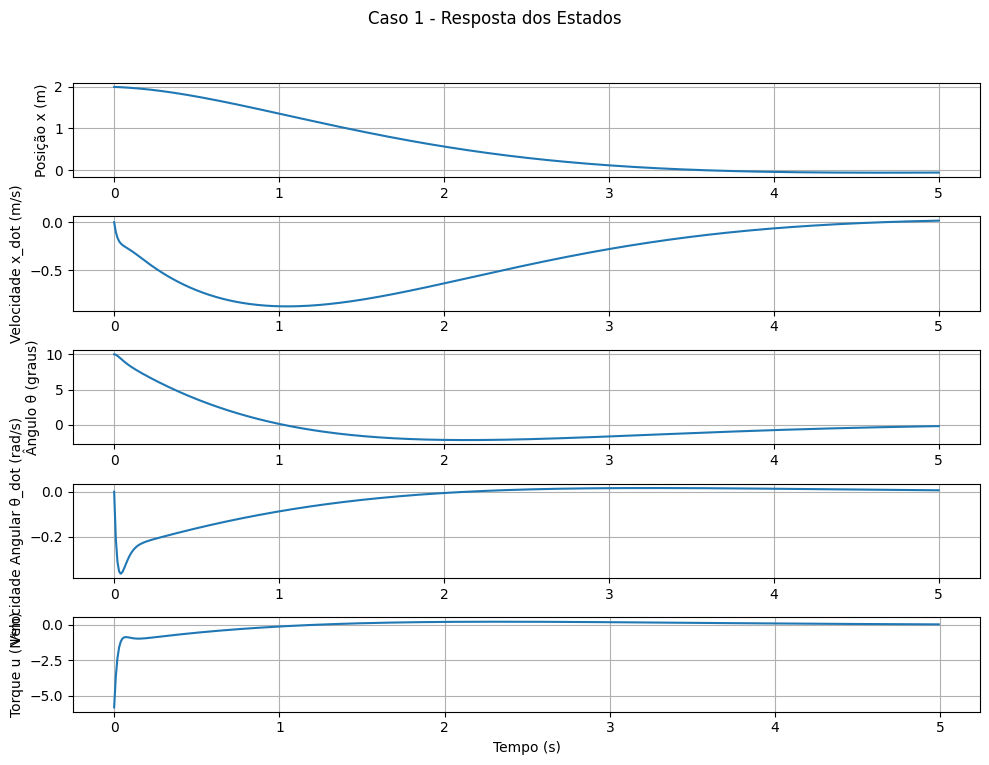

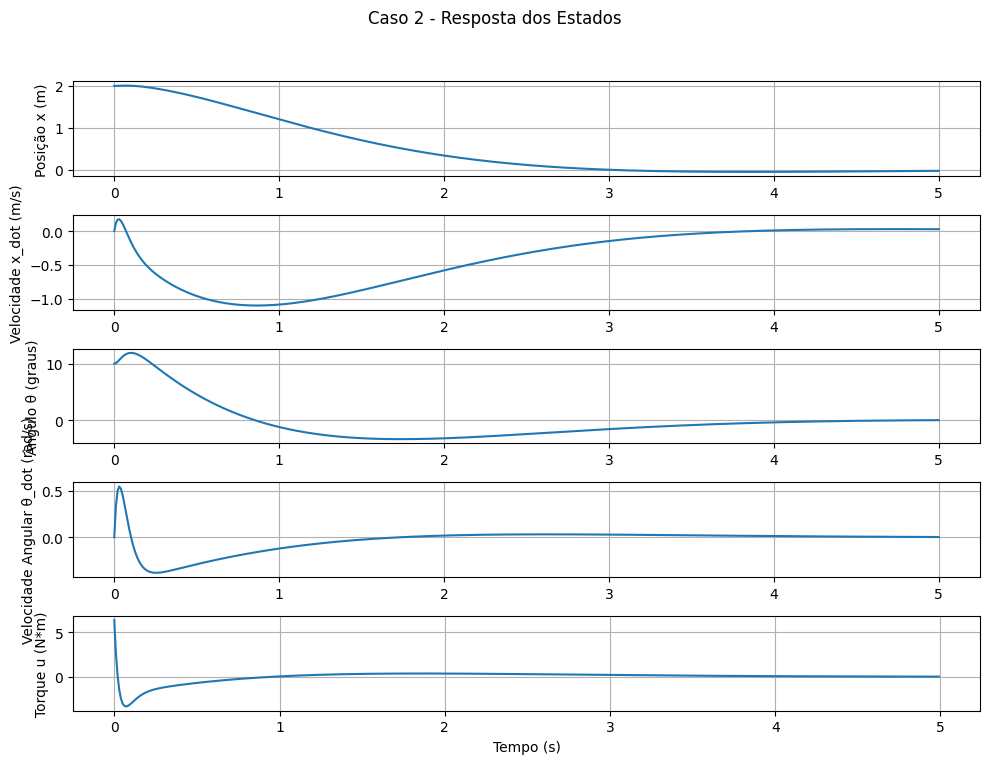

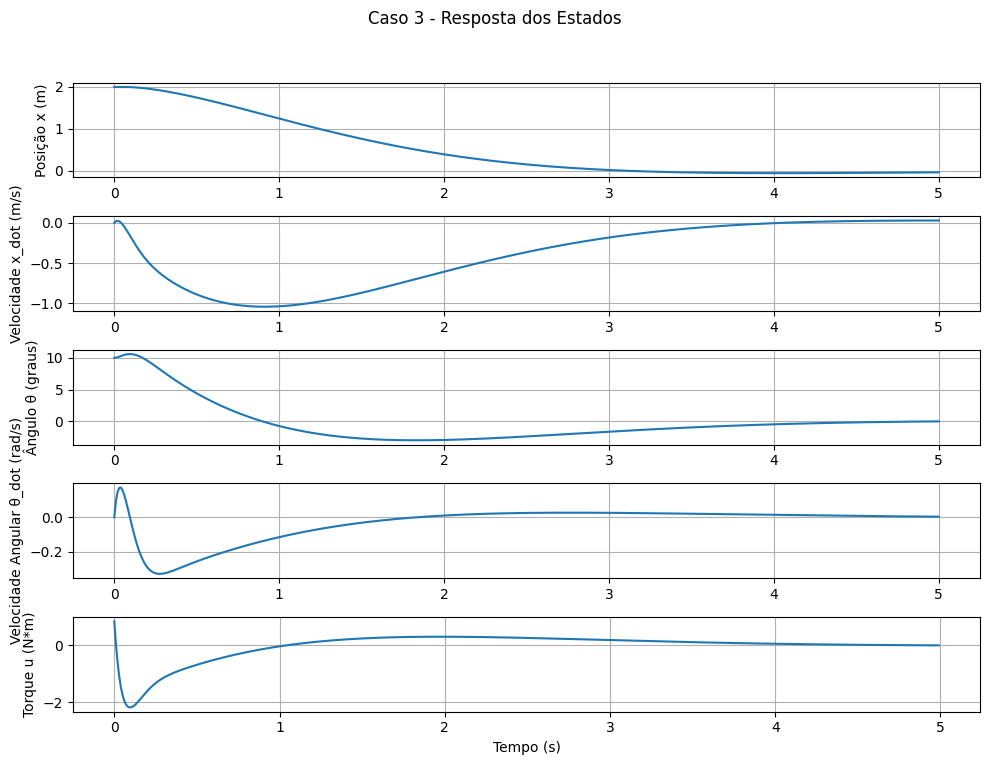

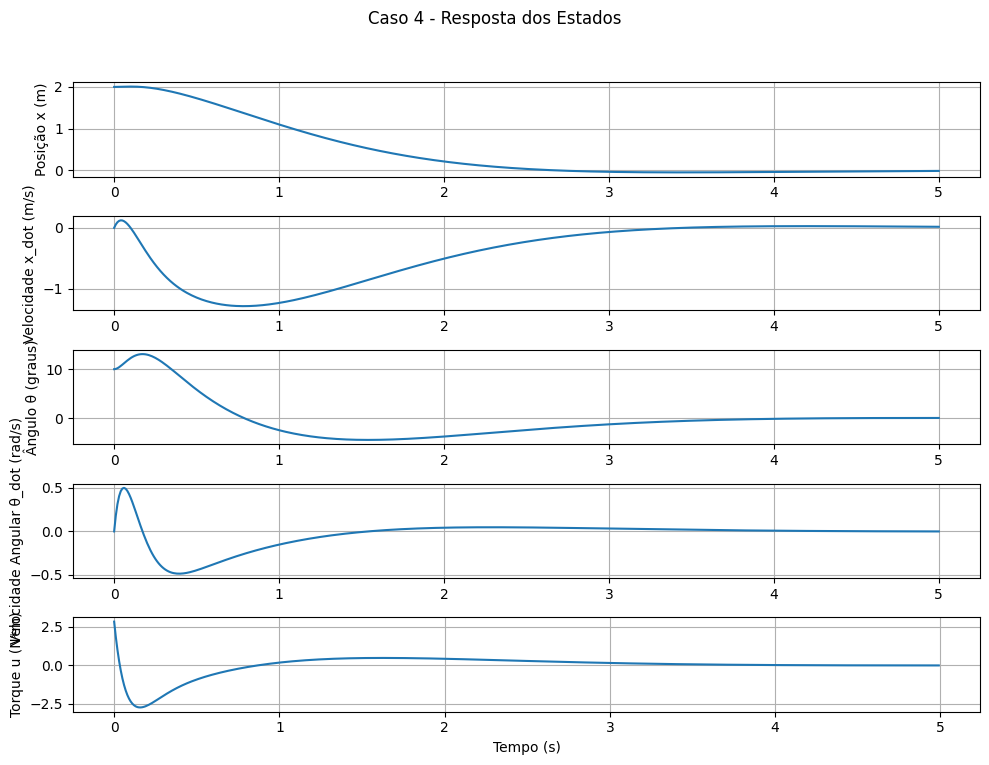

In [ ]:
# Importar biblioteca para coloração nos gráficos
import matplotlib.cm as cm

# Imprimir os autovalores e ganhos K para cada caso
for i, (Q, R, K, eigvals) in enumerate(zip(Q_values, R_values, K_list, eigvals_list)):
    print(f'\nCaso {i+1}:')
    print(f'Q = \n{Q}')
    print(f'R = \n{R}')
    print(f'Ganho K = \n{K}')
    print('Autovalores da Matriz em Malha Fechada:')
    print(eigvals)

# Plotar os autovalores no plano complexo
plt.figure()
colors = cm.rainbow(np.linspace(0, 1, len(Q_values)))
for i, eigvals in enumerate(eigvals_list):
    plt.scatter(eigvals.real, eigvals.imag, color=colors[i], label=f'Caso {i+1}')
plt.title('Autovalores da Matriz em Malha Fechada para Diferentes Q e R')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

# Plotar os estados e controle para cada caso
for i, (x, u) in enumerate(zip(states_list, controls_list)):
    plt.figure(figsize=(10,8))
    plt.suptitle(f'Caso {i+1} - Resposta dos Estados')

    # Posição x
    plt.subplot(5,1,1)
    plt.plot(time, x[0, :].flatten())
    plt.ylabel('Posição x (m)')
    plt.grid(True)

    # Velocidade x_dot
    plt.subplot(5,1,2)
    plt.plot(time, x[1, :].flatten())
    plt.ylabel('Velocidade x_dot (m/s)')
    plt.grid(True)

    # Ângulo theta
    plt.subplot(5,1,3)
    plt.plot(time, x[2, :].flatten() * (180/np.pi))  # Converter radianos para graus
    plt.ylabel('Ângulo θ (graus)')
    plt.grid(True)

    # Velocidade angular theta_dot
    plt.subplot(5,1,4)
    plt.plot(time, x[3, :].flatten())
    plt.ylabel('Velocidade Angular θ_dot (rad/s)')
    plt.grid(True)

    # Sinal de controle u
    plt.subplot(5,1,5)
    plt.plot(time[:-1], u[0, :].flatten())
    plt.xlabel('Tempo (s)')
    plt.ylabel('Torque u (N*m)')
    plt.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


Parte 3

In [ ]:
# Importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Fechar todas as figuras abertas
plt.close('all')

# Definir os parâmetros físicos do sistema
M = 0.5    # Massa do carro (kg)
m = 0.2    # Massa do pêndulo (kg)
b = 0.1    # Coeficiente de atrito do carro (N/m/s)
I = 0.006  # Momento de inércia do pêndulo (kg*m^2)
g = 9.81   # Aceleração da gravidade (m/s^2)
l = 0.3    # Comprimento até o centro de massa do pêndulo (m)
alpha1 = b     # Coeficiente de atrito linear
alpha2 = 0.05  # Coeficiente de atrito angular

# Definir Q e R (da Parte 2, Caso 1)
Q = np.diag([10, 1, 1000, 1])
R = np.array([[0.01]])

# Calcular as matrizes A e B em tempo contínuo (da linearização correta)
from scipy.linalg import solve_continuous_are

# Matrizes A_cont e B_cont (verifique se estão corretas)
p = I * (M + m) - (m * l * np.cos(0))**2  # Usar θ = 0 para a linearização

A_cont = np.array([
    [0, 1, 0, 0],
    [0, -alpha1 / (M + m), (m * g * l) / (M + m), -alpha2 / (M + m)],
    [0, 0, 0, 1],
    [0, -alpha1 / (l * (M + m)), (M + m) * g / (l * (M + m)), -alpha2 * (M + m) / (I * (M + m) - (m * l)**2)]
])

B_cont = np.array([
    [0],
    [1 / (M + m)],
    [0],
    [1 / (l * (M + m))]
])

# Resolver a equação de Riccati algébrica contínua
P_cont = solve_continuous_are(A_cont, B_cont, Q, R)

# Calcular o ganho de controle em tempo contínuo K
K = np.linalg.inv(R) @ B_cont.T @ P_cont

# Definir a dinâmica não linear do sistema com as equações corrigidas
def dinamica_nao_linear(t, estado):
    x = estado[0]
    x_ponto = estado[1]
    theta = estado[2]
    theta_ponto = estado[3]

    # Calcular o controle
    vetor_estado = np.array([[x], [x_ponto], [theta], [theta_ponto]])
    u = -K @ vetor_estado
    u = u.item()  # Converter de array para escalar

    # Limitar o controle para evitar valores excessivos (ajuste conforme necessário)
    u = np.clip(u, -50, 50)

    # Equações de movimento (não lineares)
    sin_theta = np.sin(theta)
    cos_theta = np.cos(theta)

    # Denominador comum
    denom = I * (M + m) - (m * l * cos_theta)**2
    if abs(denom) < 1e-4:
        denom = 1e-4 * np.sign(denom)

    # Numeradores
    num_theta = (M + m) * (m * g * l * sin_theta - alpha2 * theta_ponto) + m * l * cos_theta * (alpha1 * x_ponto - u - m * l * theta_ponto**2 * sin_theta)
    theta_2ponto = num_theta / denom

    num_x = u + m * l * (theta_ponto**2 * sin_theta - theta_2ponto * cos_theta) - alpha1 * x_ponto
    x_2ponto = num_x / (M + m)

    # Retornar as derivadas
    return [x_ponto, x_2ponto, theta_ponto, theta_2ponto]

# Definir as condições iniciais
x0 = [2, 0, 10 * np.pi / 180, 0]  # Estado inicial: [x, x_ponto, theta, theta_ponto]

# Definir o intervalo de tempo para a simulação
t_inicio = 0
t_fim = 5  # Aumentar o tempo de simulação após testes iniciais
t_avaliacao = np.linspace(t_inicio, t_fim, 500)  # Pontos de tempo onde a solução é avaliada

# Simular o sistema usando solve_ivp com método adequado para sistemas rígidos
solucao = solve_ivp(dinamica_nao_linear, [t_inicio, t_fim], x0, t_eval=t_avaliacao, method='Radau')

# Extrair os estados e o tempo
tempo = solucao.t
x = solucao.y[0, :]
x_ponto = solucao.y[1, :]
theta = solucao.y[2, :]
theta_ponto = solucao.y[3, :]

# Calcular o controle ao longo do tempo
u = np.zeros_like(tempo)
for i in range(len(tempo)):
    vetor_estado = np.array([[x[i]], [x_ponto[i]], [theta[i]], [theta_ponto[i]]])
    u[i] = (-K @ vetor_estado).item()
    # Limitar o controle
    u[i] = np.clip(u[i], -50, 50)


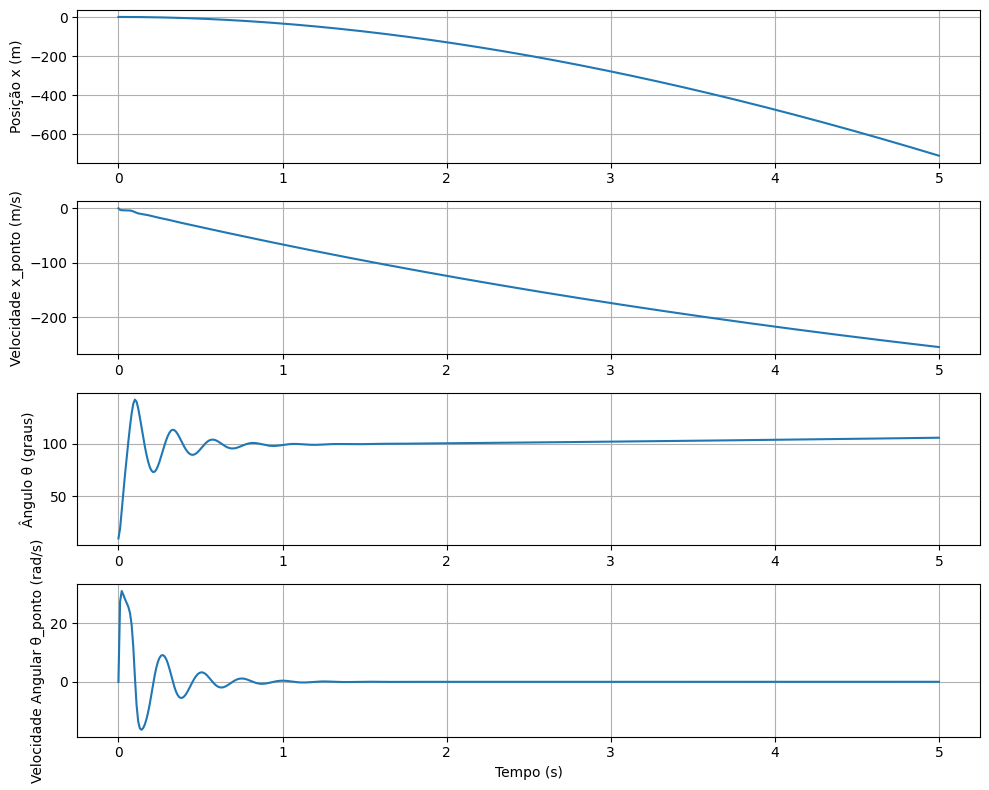

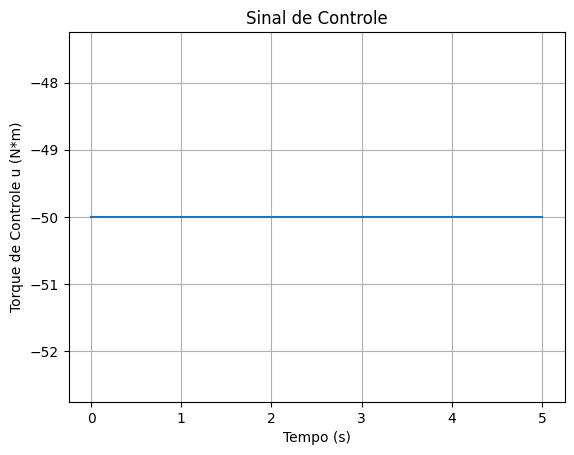

Estados finais em t = 5.00 s:
Posição x = -711.4294 m
Velocidade x_ponto = -255.2238 m/s
Ângulo θ = 105.6219 graus
Velocidade Angular θ_ponto = 0.0369 rad/s


In [ ]:
# Plotar os estados do sistema ao longo do tempo
plt.figure(figsize=(10, 8))

# Posição x
plt.subplot(4, 1, 1)
plt.plot(tempo, x)
plt.ylabel('Posição x (m)')
plt.grid(True)

# Velocidade x_ponto
plt.subplot(4, 1, 2)
plt.plot(tempo, x_ponto)
plt.ylabel('Velocidade x_ponto (m/s)')
plt.grid(True)

# Ângulo theta
plt.subplot(4, 1, 3)
plt.plot(tempo, np.degrees(theta))  # Converter radianos para graus
plt.ylabel('Ângulo θ (graus)')
plt.grid(True)

# Velocidade angular theta_ponto
plt.subplot(4, 1, 4)
plt.plot(tempo, theta_ponto)
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade Angular θ_ponto (rad/s)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotar o sinal de controle ao longo do tempo
plt.figure()
plt.plot(tempo, u)
plt.xlabel('Tempo (s)')
plt.ylabel('Torque de Controle u (N*m)')
plt.title('Sinal de Controle')
plt.grid(True)
plt.show()

# Analisar os resultados
print('Estados finais em t = {:.2f} s:'.format(t_fim))
print('Posição x = {:.4f} m'.format(x[-1]))
print('Velocidade x_ponto = {:.4f} m/s'.format(x_ponto[-1]))
print('Ângulo θ = {:.4f} graus'.format(np.degrees(theta[-1])))
print('Velocidade Angular θ_ponto = {:.4f} rad/s'.format(theta_ponto[-1]))



**4 Atividade 4**


Nessa atividade, o objetivo é projetar um controlador LQR com rastreamento para modelos em espaço de estados em tempo discreto.

Nesse exemplo, será utilizado o modelo simplificado de um quadricóptero restrito a movimentos em um plano, conforme ilustrado na Figura 2. As EDO que descrevem o comportamento dessa planta são dadas a seguir:

---

**Figura 2:** Quadricóptero

---

Para este modelo, definimos as equações diferenciais que representam o movimento e controle do quadricóptero no plano. O objetivo é desenvolver um controlador de rastreamento usando o controlador LQR para garantir que o sistema siga uma trajetória desejada.

Assumindo o modelo linearizado e discretizado do sistema, as equações de estado e controle podem ser expressas como:
$$
x_{k+1} = A_d x_k + B_d u_k,
$$
onde:
- $x_k $ é o vetor de estados no instante $k $,
- $u_k $ é o vetor de controle no instante $k $,
- $A_d $ e $B_d $ são as matrizes discretizadas do sistema.

O objetivo do controlador LQR com rastreamento é minimizar a função custo:
$$
J = \sum_{k=0}^{\infty} \left[ (x_k - x_{\text{ref}})^\top Q (x_k - x_{\text{ref}}) + u_k^\top R u_k \right],
$$
onde:
- $x_{\text{ref}} $ é o vetor de referência da trajetória desejada,
- $Q $ é a matriz de penalização para os estados,
- $R $ é a matriz de penalização para o controle.

A lei de controle $u_k $ é dada por:
$$
u_k = -K (x_k - x_{\text{ref}}),
$$
onde $K $ é o ganho de realimentação de estados obtido através do controlador LQR.

Para implementar esse controle em Matlab, utilize o comando `dlqr` para calcular $K $ e configure a referência desejada para o sistema.

---

$$
\ddot{z} = \frac{1}{M} (F_1 + F_2) \cos(\theta) - g \tag{3}
$$
$$
\ddot{y} = \frac{1}{M} (F_1 + F_2) \sin(\theta) \tag{4}
$$
$$
\ddot{\theta} = \frac{l}{I_{xx}} (F_1 - F_2) \tag{5}
$$

---

O vetor de estados é dado por:
$$
x = \begin{bmatrix} z \\ y \\ \dot{z} \\ \dot{y} \\ \theta \\ \dot{\theta} \end{bmatrix},
$$
onde:

$$
\begin{cases}
z \rightarrow \text{posição na direção } z \\
y \rightarrow \text{posição na direção } y \\
\dot{z} \rightarrow \text{velocidade na direção } z \\
\dot{y} \rightarrow \text{velocidade na direção } y \\
\theta \rightarrow \text{posição angular (roll)} \\
\dot{\theta} \rightarrow \text{velocidade angular}
\end{cases}
$$

---

Essas equações representam a dinâmica do quadricóptero em um plano, onde:
- $z $ e $y $ são as posições nas direções vertical e horizontal, respectivamente,
- $\dot{z} $ e $\dot{y} $ são as velocidades correspondentes,
- $\theta $ é o ângulo de inclinação (roll),
- $\dot{\theta} $ é a velocidade angular.

Essas variáveis descrevem o estado do sistema, que é controlado pelas forças $F_1 $ e $F_2 $, aplicadas em cada rotor.

O sinal de entrada é dado pelas forças de empuxo $F_1 $ e $F_2 $ geradas pelos motores:

$$
u = \begin{bmatrix} F_1 \\ F_2 \end{bmatrix}
$$

---

Adotando:

$$
x_0 = \begin{bmatrix} z_{\text{ref}} \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}, \quad u_0 = \begin{bmatrix} \frac{1}{2} g M \\ \frac{1}{2} g M \end{bmatrix},
$$

como ponto de operação do sistema (altura $z_{\text{ref}} $ com velocidade zero e inclinação $\theta = 0 $), podemos obter um modelo linearizado na forma:

$$
\delta \dot{x} = A(x_0, u_0) \delta x + B(x_0, u_0) \delta u,
$$

válido para regiões próximas do ponto $(x_0, u_0) $. Após obter o modelo linearizado, utilize o comando `c2d` para obter o equivalente em tempo discreto.

Considere a condição inicial do sistema real como:

$$
x_0 = \begin{bmatrix} 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \end{bmatrix}^\top.
$$

---

### Passos para Projetar o Controlador LQR

1. **Assumir Estados Acessíveis**: Suponha que todos os estados do sistema estejam disponíveis.
  
2. **Controlador LQR**: Projete um controlador de realimentação de estados do tipo LQR que estabilize o quadricóptero na posição $z = 5 $ e $y = 0 $ durante 5 segundos. Em seguida, configure o sistema para que o quadricóptero desça até $z = 3 $ mantendo $y = 0 $.

3. **Código de Referência**: Use o código de exemplo `quadcopter-control.zip` disponível no e-disciplina como ponto de partida para a implementação.

4. **Trajetória no Plano $zy $**: Após a estabilização, crie uma trajetória personalizada no plano $zy $ e utilize o controle LQR para fazer o quadricóptero percorrer essa trajetória. Experimente com trajetórias criativas, como linhas, curvas, ou padrões específicos de movimento.

**Dica**: O controle LQR permite rastrear trajetórias ao adaptar o ganho de realimentação para minimizar o erro entre a trajetória desejada e a posição atual do quadricóptero.

---

In [ ]:
# Importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_discrete_are, block_diag
from scipy.signal import cont2discrete

# Parâmetros físicos do quadricóptero
M = 0.5     # Massa total (kg)
l = 0.3     # Distância do centro de massa aos motores (m)
Ixx = 0.1   # Momento de inércia em torno do eixo x (kg*m^2)
g = 9.81    # Aceleração da gravidade (m/s^2)

# Print dos parâmetros físicos
print("Parâmetros físicos do sistema:")
print(f"Massa total M = {M} kg")
print(f"Distância l = {l} m")
print(f"Momento de inércia Ixx = {Ixx} kg*m^2")
print(f"Aceleração da gravidade g = {g} m/s^2")

# Ponto de operação
z_ref = 5.0  # Altura de referência (m)
x0 = np.array([z_ref, 0.0, 0.0, 0.0, 0.0, 0.0])  # Estado de equilíbrio

F1_0 = 0.5 * M * g
F2_0 = F1_0
u0 = np.array([F1_0, F2_0])  # Entrada de equilíbrio

# Print dos pontos de operação
print("\nPonto de operação:")
print(f"Estado de equilíbrio x0 = {x0}")
print(f"Entradas de equilíbrio u0 = {u0}")

# Matrizes do sistema linearizado
A = np.array([
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, -g/M, 0],
    [0, 0, 0, 0, g/M, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0]
])

# Atualizando B com valores corretos
l_over_Ixx = l / Ixx
B = np.array([
    [0, 0],
    [0, 0],
    [1/M, 1/M],
    [0, 0],
    [0, 0],
    [l_over_Ixx, -l_over_Ixx]
])

# Print das matrizes A e B
print("\nMatriz A:")
print(A)
print("\nMatriz B:")
print(B)

# Tempo de amostragem
Ts = 0.1  # segundos

# Sistema contínuo
system = (A, B, np.eye(6), np.zeros((6, 2)))

# Discretização
A_d, B_d, C_d, D_d, dt = cont2discrete(system, Ts)

# Print das matrizes discretizadas
print("\nMatriz A_d (discreta):")
print(A_d)
print("\nMatriz B_d (discreta):")
print(B_d)

# Matrizes de peso ajustadas
Q = np.diag([1, 1, 0.1, 0.1, 10, 0.1])
R = np.diag([1, 1])

# Print das matrizes de peso
print("\nMatriz de peso Q:")
print(Q)
print("\nMatriz de peso R:")
print(R)

# Matriz de saída (usando C_d da discretização)
C_d = np.array([
    [1, 0, 0, 0, 0, 0],  # delta z
    [0, 1, 0, 0, 0, 0]   # delta y
])

D_d = np.zeros((2, 2))  # Matriz D discreta

# Número de estados e saídas
n = A_d.shape[0]
q = C_d.shape[0]

# Construir o sistema aumentado corretamente
A_aug = np.block([
    [A_d, np.zeros((n, q))],
    [-C_d @ A_d, np.eye(q)]
])

B_aug = np.block([
    [B_d],
    [-C_d @ B_d]
])

# Print das matrizes aumentadas
print("\nMatriz A_aug (sistema aumentado):")
print(A_aug)
print("\nMatriz B_aug (sistema aumentado):")
print(B_aug)

# Matrizes de peso aumentadas
Q_aug = block_diag(Q, np.eye(q) * 10)
R_aug = R

# Verificar a controlabilidade do sistema aumentado
from scipy.linalg import svd

U, s, Vh = svd(B_aug)
rank_B_aug = np.sum(s > 1e-10)
print(f"\nPosto da matriz B_aug: {rank_B_aug} (Esperado: {B_aug.shape[1]})")

# Resolver a equação de Riccati discreta para o sistema aumentado
P_aug = solve_discrete_are(A_aug, B_aug, Q_aug, R_aug)

# Print da matriz P_aug
print("\nMatriz P_aug (solução da equação de Riccati):")
print(P_aug)

# Calcular o ganho K aumentado
K_aug = np.linalg.inv(B_aug.T @ P_aug @ B_aug + R_aug) @ (B_aug.T @ P_aug @ A_aug)

# Separar os ganhos
Kx = K_aug[:, :n]
Ki = K_aug[:, n:]

# Print dos ganhos
print("\nGanho Kx (realimentação de estados):")
print(Kx)
print("\nGanho Ki (integrador):")
print(Ki)

# Tempo de simulação
T_total = 10  # segundos
t_sim = np.arange(0, T_total + Ts, Ts)
N_sim = len(t_sim)

# Condição inicial do sistema (delta x)
x = np.zeros((6, N_sim))
x[:, 0] = np.array([0, 0, 0, 0, 0, 0])  # Iniciando no ponto de operação (delta x = 0)

# Estado do integrador
m = np.zeros((2, N_sim))

# Referência desejada (delta z e delta y)
r = np.zeros((2, N_sim))
r[0, :] = 0  # delta z = 0 (manter altura inicial)
r[0, int(5/Ts):] = -2  # Após 5s, descer 2 m (delta z = -2)
r[1, :] = 0  # delta y = 0 (manter posição lateral)

# Imprimir as primeiras referências
print("\nPrimeiros valores de referência (r):")
print(r[:, :10])

# Inicializar o vetor de controle
u = np.zeros((2, N_sim))

# Simulação
for k in range(N_sim - 1):
    # Erro de rastreamento
    e = r[:, k] - C_d @ x[:, k]

    # Atualização do integrador
    m[:, k+1] = m[:, k] + e * Ts

    # Controle com rastreamento
    delta_u = -Kx @ x[:, k] - Ki @ m[:, k+1]
    u[:, k] = delta_u + u0  # Adicionar ponto de operação

    # Saturação do controle (limites físicos dos motores)
    u[:, k] = np.clip(u[:, k], 0, M * g * 2)  # Força máxima duplicada

    # Atualizar o estado do sistema
    delta_u_actual = u[:, k] - u0
    x[:, k+1] = A_d @ x[:, k] + B_d @ delta_u_actual

    # Prints intermediários a cada segundo
    if k % int(1 / Ts) == 0:
        print(f"\nTempo t = {t_sim[k]:.1f}s")
        print(f"Erro de rastreamento e = {e}")
        print(f"Estado x = {x[:, k]}")
        print(f"Integrador m = {m[:, k]}")
        print(f"Controle u = {u[:, k]}")

# Após a simulação, imprimir o último estado
print(f"\nEstado final em t = {t_sim[-1]:.1f}s")
print(f"Estado x = {x[:, -1]}")
print(f"Integrador m = {m[:, -1]}")
print(f"Controle u = {u[:, -2]}")


Parâmetros físicos do sistema:
Massa total M = 0.5 kg
Distância l = 0.3 m
Momento de inércia Ixx = 0.1 kg*m^2
Aceleração da gravidade g = 9.81 m/s^2

Ponto de operação:
Estado de equilíbrio x0 = [5. 0. 0. 0. 0. 0.]
Entradas de equilíbrio u0 = [2.4525 2.4525]

Matriz A:
[[  0.     0.     1.     0.     0.     0.  ]
 [  0.     0.     0.     1.     0.     0.  ]
 [  0.     0.     0.     0.   -19.62   0.  ]
 [  0.     0.     0.     0.    19.62   0.  ]
 [  0.     0.     0.     0.     0.     1.  ]
 [  0.     0.     0.     0.     0.     0.  ]]

Matriz B:
[[ 0.  0.]
 [ 0.  0.]
 [ 2.  2.]
 [ 0.  0.]
 [ 0.  0.]
 [ 3. -3.]]

Matriz A_d (discreta):
[[ 1.       0.       0.1      0.      -0.0981  -0.00327]
 [ 0.       1.       0.       0.1      0.0981   0.00327]
 [ 0.       0.       1.       0.      -1.962   -0.0981 ]
 [ 0.       0.       0.       1.       1.962    0.0981 ]
 [ 0.       0.       0.       0.       1.       0.1    ]
 [ 0.       0.       0.       0.       0.       1.     ]]

Matriz B_d (d

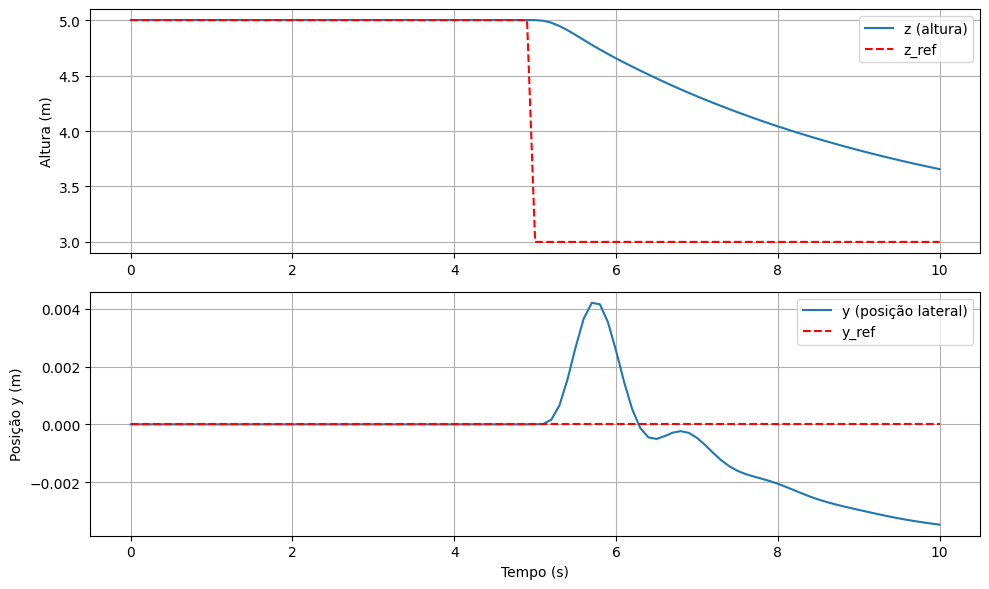

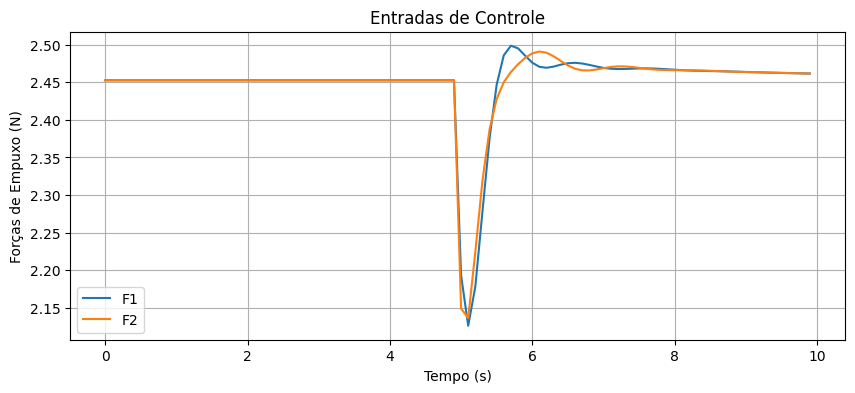

In [ ]:
# Estados z e y (adicionando o ponto de operação)
z = x[0, :] + z_ref
y = x[1, :]  # Posição lateral (delta y) + posição inicial (0)

# Altura de referência
z_ref_traj = r[0, :] + z_ref

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t_sim, z, label='z (altura)')
plt.plot(t_sim, z_ref_traj, 'r--', label='z_ref')
plt.ylabel('Altura (m)')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t_sim, y, label='y (posição lateral)')
plt.plot(t_sim, r[1, :] + 0, 'r--', label='y_ref')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição y (m)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Controle F1 e F2
plt.figure(figsize=(10, 4))
plt.plot(t_sim[:-1], u[0, :-1], label='F1')
plt.plot(t_sim[:-1], u[1, :-1], label='F2')
plt.xlabel('Tempo (s)')
plt.ylabel('Forças de Empuxo (N)')
plt.title('Entradas de Controle')
plt.legend()
plt.grid(True)
plt.show()

